In [5]:
import pandas as pd
import numpy as np

# 시계열 데이터의 모의 데이터를 작성
# 시계열 데이터에는 반드시 시간값이 들어가야 함
dates = pd.date_range(start='2021-01-04', periods=100, freq='D')

samsung_prices = np.random.randint(80000, 90000, 100)
samsung_data = {'Date' : dates, '005930.KS' : samsung_prices}
samsung_df = pd.DataFrame(samsung_data)
samsung_df.set_index('Date', inplace=True)


In [4]:
lg_prices = np.random.randint(140000, 160000, 100)
lg_data = {'Date' : dates, '066570.KS' : lg_prices}
lg_df = pd.DataFrame(lg_data)
lg_df.set_index('Date', inplace=True)

In [13]:
total_df = pd.concat([samsung_df, lg_df], axis=1)

total_df = total_df.loc[:, ['005930.KS', '066570.KS']]
total_df.columns = ['Samsung', 'LG']
total_df

,Samsung,LG
Date,,
2021-01-04,86313,148397
2021-01-05,84560,141485
2021-01-06,81514,154382
2021-01-07,85181,150024
2021-01-08,81702,151750
...,...,...
2021-04-09,89255,158232
2021-04-10,87417,153446
2021-04-11,84646,147701


In [15]:
total_df.to_csv('stock_price.csv', encoding='utf-8')

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data = pd.read_csv('stock_price.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
print(f"stock_data['Date'][0] : {stock_data['Date'][0]}, type : {type(stock_data['Date'][0])}")
stock_data.set_index('Date', inplace=True)
print(stock_data)

stock_data['Date'][0] : 2021-01-04 00:00:00, type : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
            Samsung      LG
Date                       
2021-01-04    86313  148397
2021-01-05    84560  141485
2021-01-06    81514  154382
2021-01-07    85181  150024
2021-01-08    81702  151750
...             ...     ...
2021-04-09    89255  158232
2021-04-10    87417  153446
2021-04-11    84646  147701
2021-04-12    81497  157526
2021-04-13    89821  141384

[100 rows x 2 columns]


In [23]:
# pct_change : 각 행에 대해 자기 자신과 자기 이전 행 사이의 변화량 계산
# 첫 행은 이전 행이 없으므로 무조건 Nan으로 나옴
# 이번 데이터는 주가를 모방한 데이터이므로, 이 경우 변동치가 될 것
returns = stock_data.pct_change()
print(returns)

             Samsung        LG
Date                          
2021-01-04       NaN       NaN
2021-01-05 -0.020310 -0.046578
2021-01-06 -0.036022  0.091155
2021-01-07  0.044986 -0.028229
2021-01-08 -0.040842  0.011505
...              ...       ...
2021-04-09  0.010083  0.058918
2021-04-10 -0.020593 -0.030247
2021-04-11 -0.031699 -0.037440
2021-04-12 -0.037202  0.066520
2021-04-13  0.102139 -0.102472

[100 rows x 2 columns]


In [24]:
corr_matrix = returns.corr()
print(corr_matrix)

          Samsung        LG
Samsung  1.000000  0.045354
LG       0.045354  1.000000


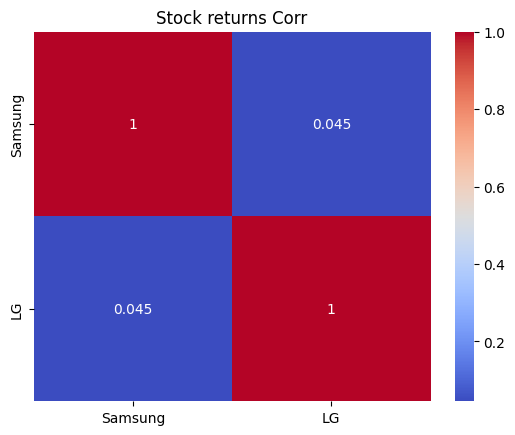

In [25]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Stock returns Corr')
plt.show()